# Opportunity 2

## Imports

In [38]:
import pandas as pd
import numpy as np
from pathlib import Path

## Data setup

In [39]:
data_dir = Path('data')
stores_data = {}

for parquet_file in data_dir.glob('*.parquet*'):
    file_name = str(parquet_file).replace('data\sales-', '').replace('.parquet.gzip', '')
    stores_data[file_name] = {'sales_df': pd.read_parquet(parquet_file).drop(['SALES_DIST', 'SOLD_TO', 'SHIP_TO'], axis=1)}

## Get first and last date for each store

In [40]:
for store, data in stores_data.items():
    df_sorted_by_dates = data['sales_df'].sort_values(by='BILL_DATE')
    data['oldest_date'] = df_sorted_by_dates.iloc[0]["BILL_DATE"]
    data['newest_date'] = df_sorted_by_dates.iloc[-1]["BILL_DATE"]

## Top 10 most sold products per store

In [41]:
for store, data in stores_data.items():
    product_sales = data['sales_df'].groupby(['MATERIAL'])['PIEZAS'].sum().sort_values(ascending=False)
    data['top_products'] = product_sales.head(10)

## Get daily sales of top 10 products of each store

In [42]:
for store, data in stores_data.items():
    idx = pd.date_range(data['oldest_date'], data['newest_date'])
    data['top_products_sales'] = {}
    for product, sale in data['top_products'].iteritems():
        product_series = data['sales_df'][data['sales_df']["MATERIAL"] == product]
        product_series = product_series.groupby('BILL_DATE').PIEZAS.sum().to_frame(name = 'PIEZAS')

        product_series.index = pd.DatetimeIndex(product_series.index)
        product_series = product_series.reindex(idx, fill_value=0)
        product_series.index.name = "BILL_DATE"
        product_series = product_series
        data['top_products_sales'][product] = product_series

## Plot top 10 products sales by store

/usr/local/anaconda3/envs/forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


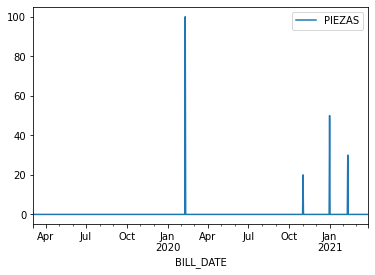

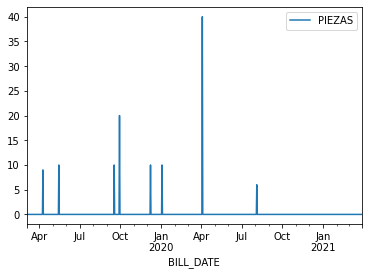

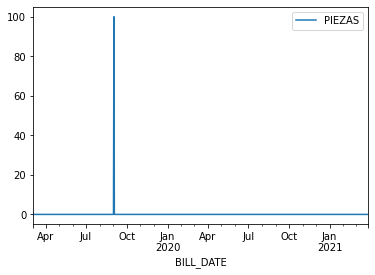

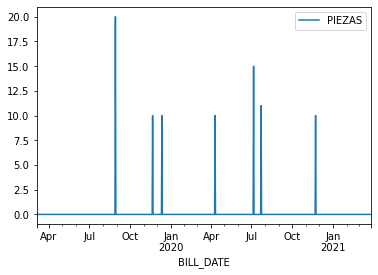

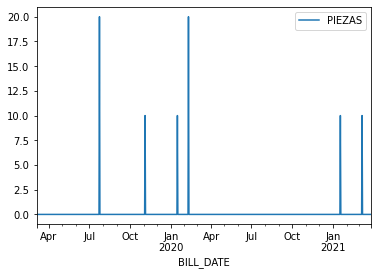

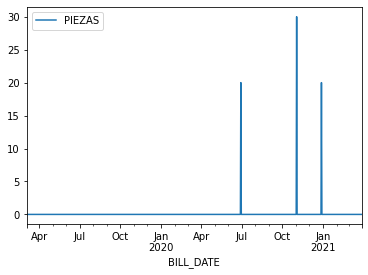

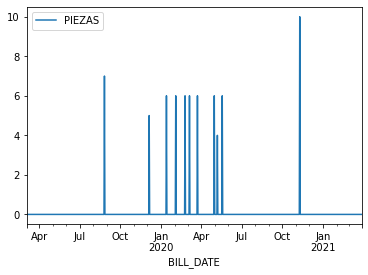

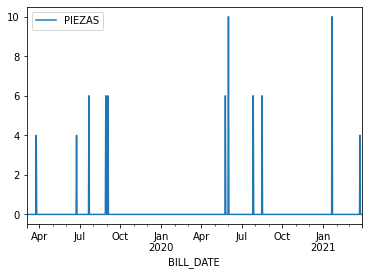

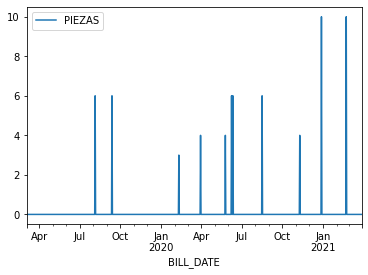

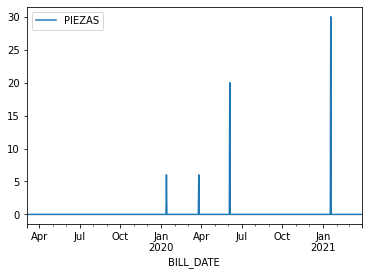

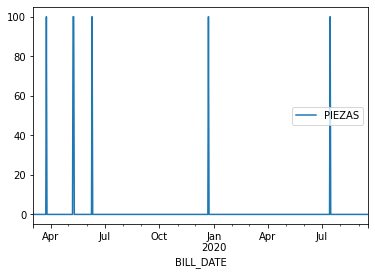

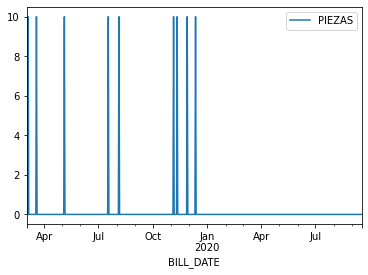

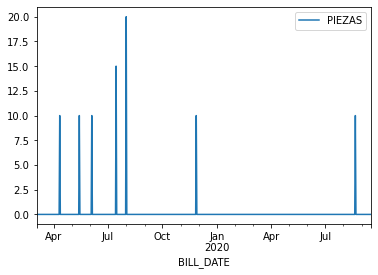

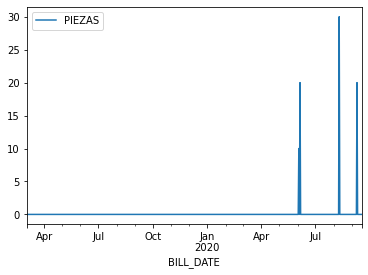

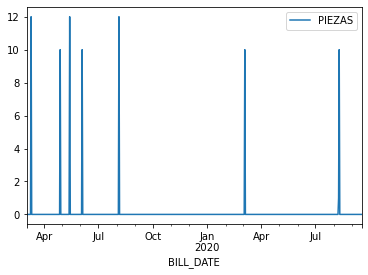

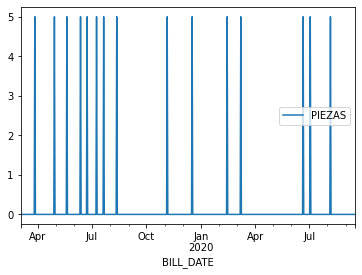

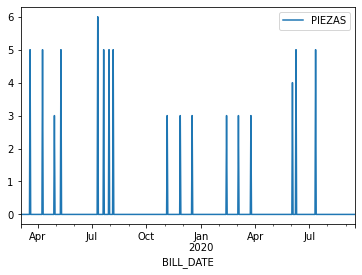

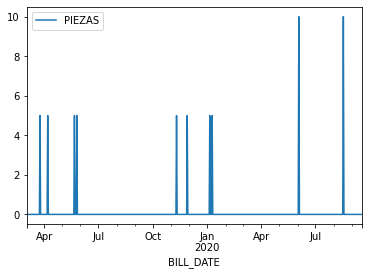

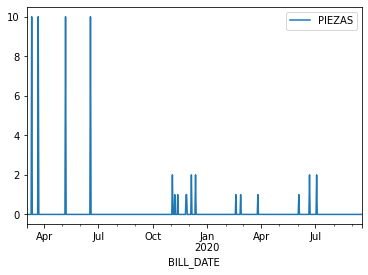

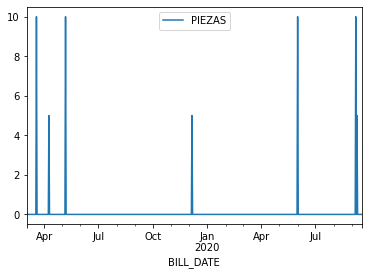

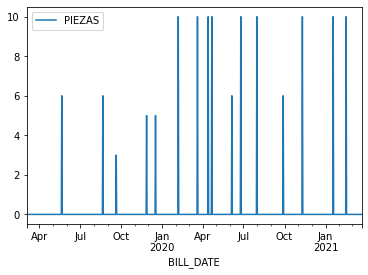

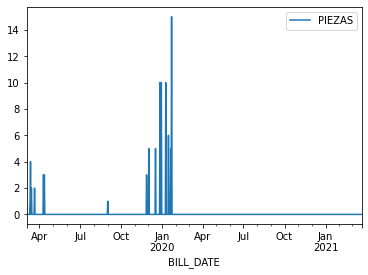

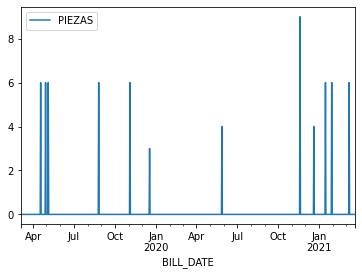

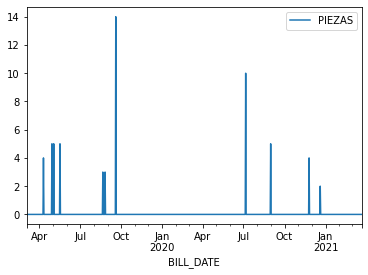

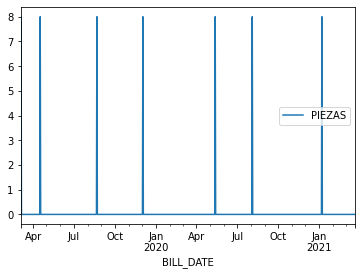

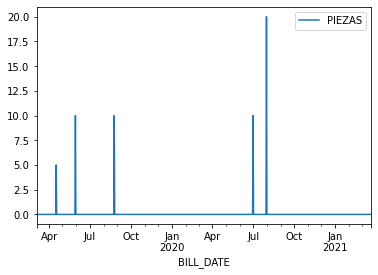

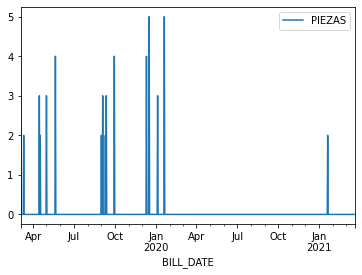

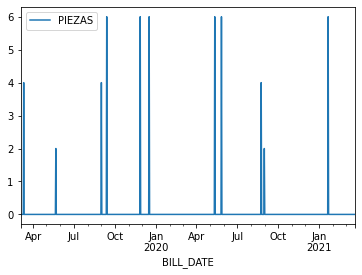

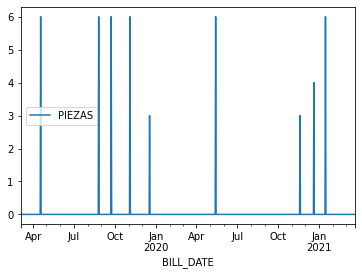

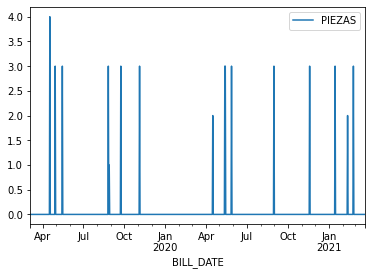

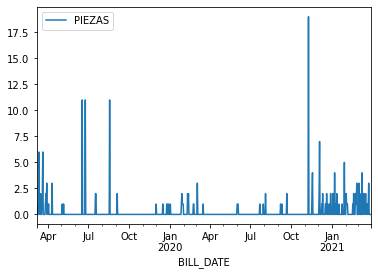

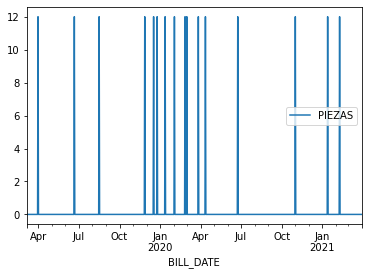

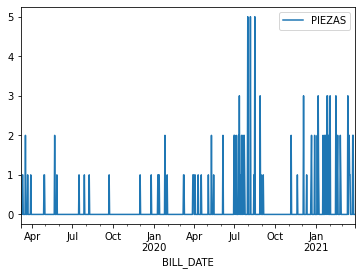

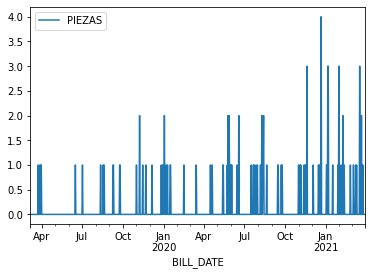

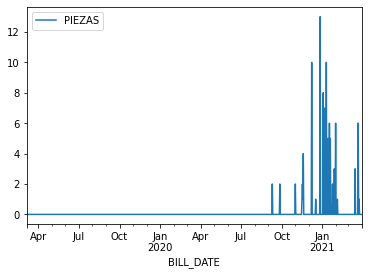

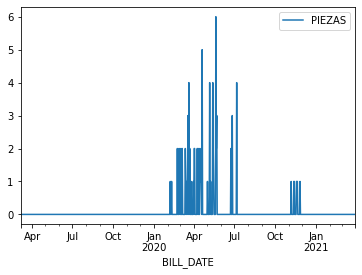

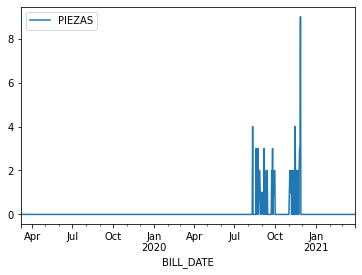

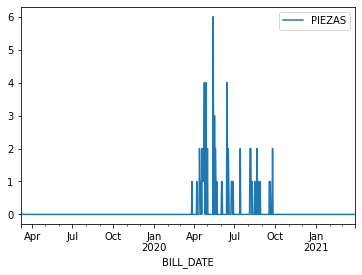

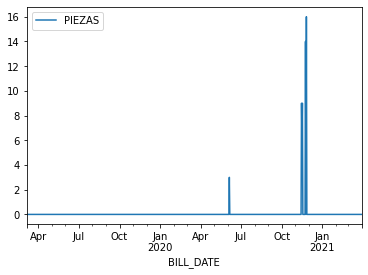

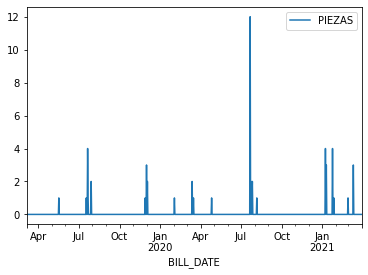

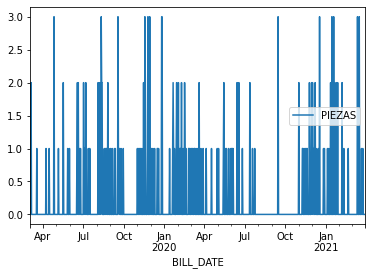

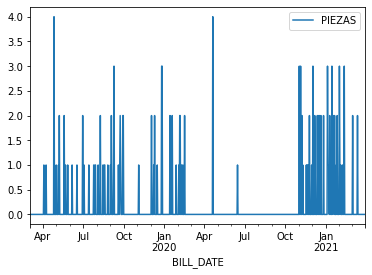

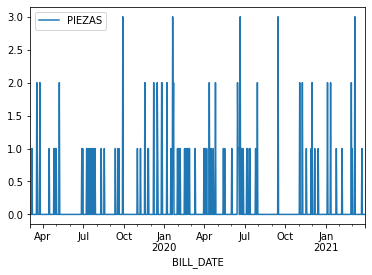

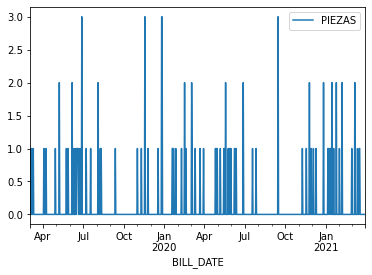

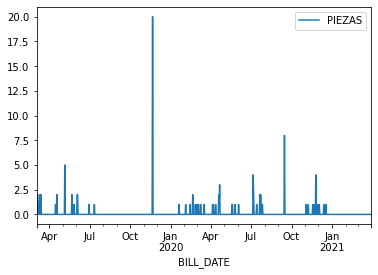

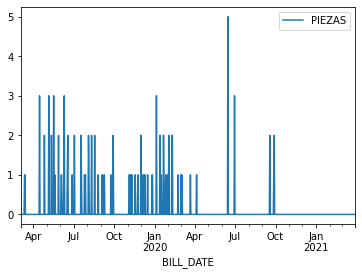

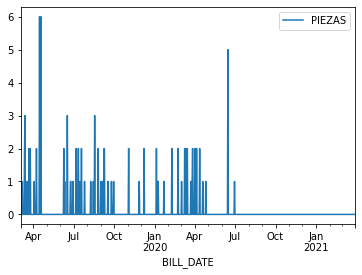

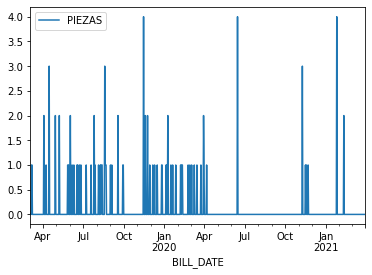

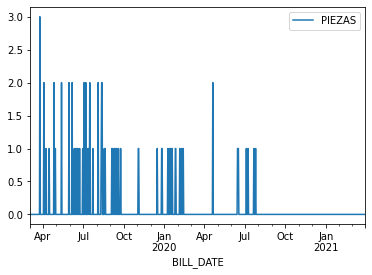

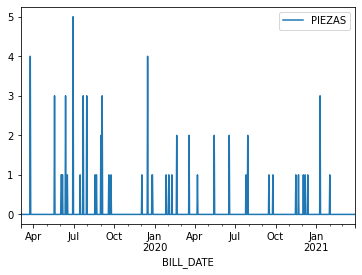

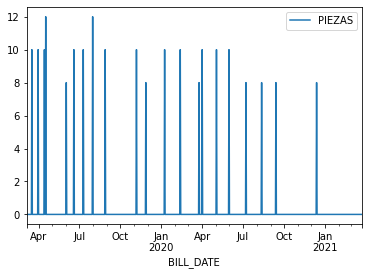

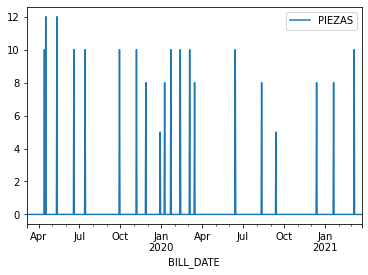

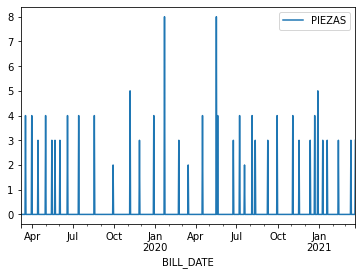

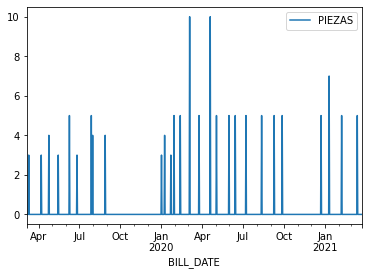

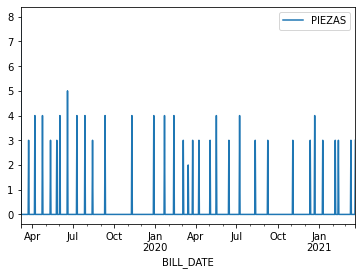

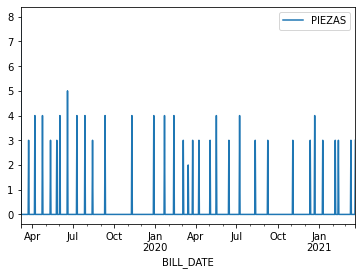

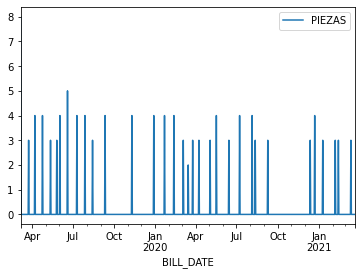

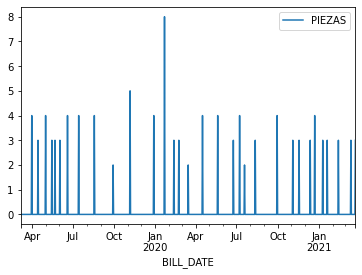

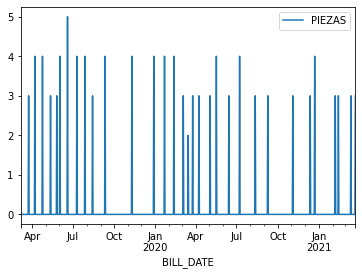

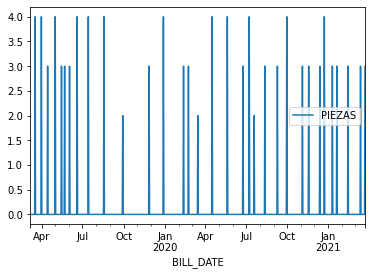

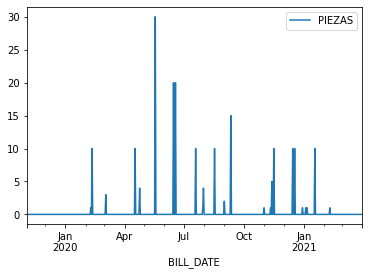

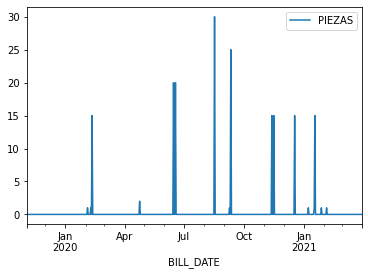

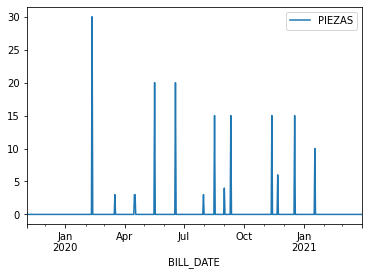

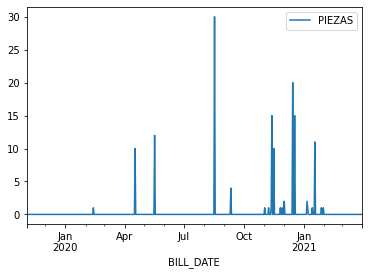

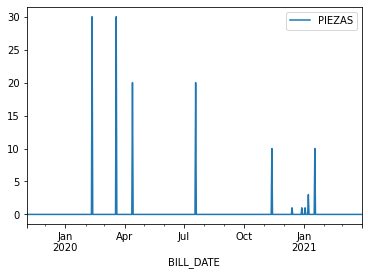

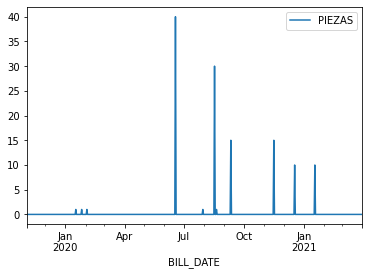

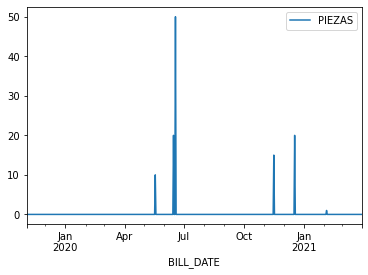

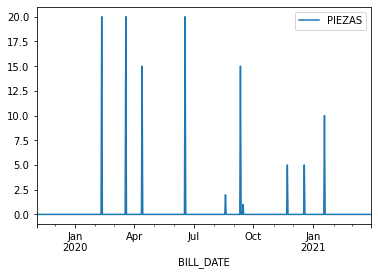

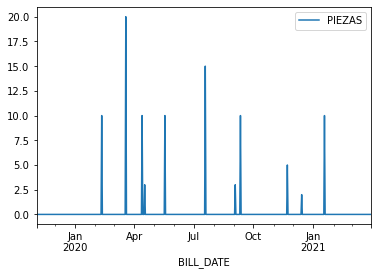

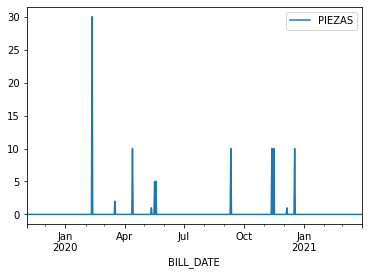

In [43]:
for store, data in stores_data.items():
    for product, sales in data['top_products_sales'].items():
        sales.plot()
